In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu
%matplotlib inline
%run "C:\Users\anasofiaccruz\Desktop\cingulate_silencing_repo\general_purpose_functions.ipynb"
%run "C:\Users\anasofiaccruz\Desktop\cingulate_silencing_repo\Latency_and_time_functions.ipynb"

####  Read the data 

In [80]:
file_path = "C:/Users/anasofiaccruz/Desktop/Optogenetics processed data/no_outliers_no_baseline.csv"
runs=pd.read_csv(file_path)

####  Calculate the IQR and medians

In [81]:
iqr = runs.groupby(
    ['group', 'stim_condition', 'session_nr']
)['time_in_cp'].describe().reset_index()

In [82]:
iqr.head()

,group,stim_condition,session_nr,count,mean,std,min,25%,50%,75%,max
0,CTRL,0,1.0,67.0,1.140615,1.036275,0.493171,0.727853,0.859866,1.122150,8.235008
1,CTRL,0,2.0,61.0,0.994793,0.482158,0.367501,0.727283,0.860250,1.123930,2.877274
2,CTRL,0,3.0,62.0,0.922474,0.426717,0.330061,0.694659,0.859923,1.050019,3.174362
3,CTRL,0,4.0,58.0,0.991991,0.479407,0.265485,0.736070,0.877837,1.082982,3.247245
4,CTRL,0,5.0,61.0,0.943869,0.350476,0.249741,0.759501,0.860570,1.058278,2.546701


#### Plot IQR and median across sessions

<Figure size 1800x1200 with 0 Axes>

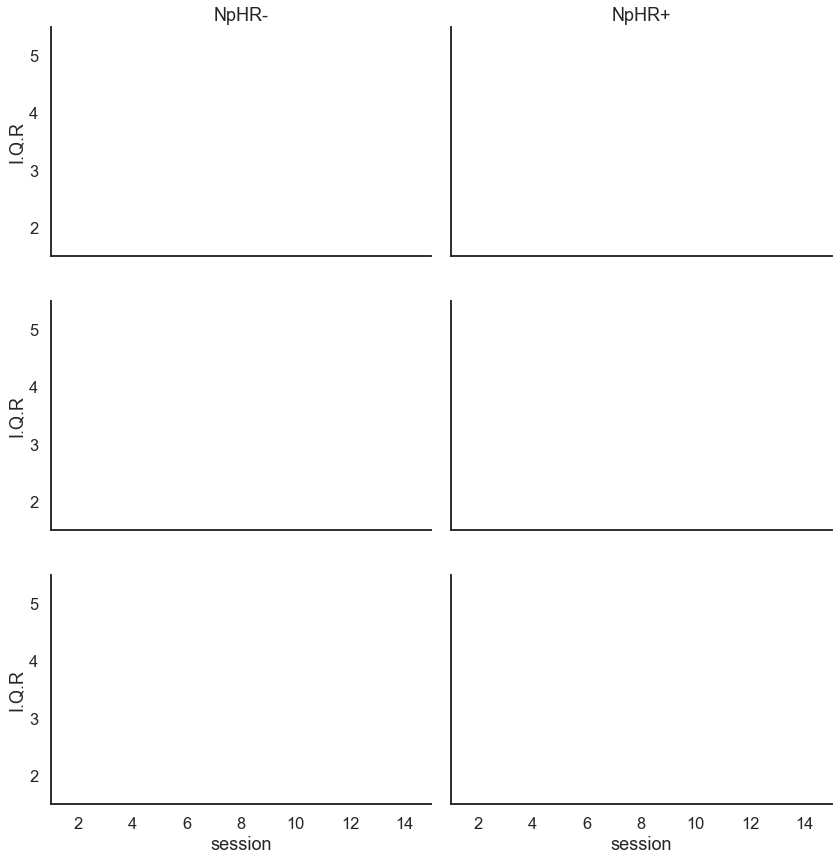

In [85]:
plot_iqr_and_median_across_sessions(iqr)

####  Plot individual medians over time

In [86]:
iqr_rats = runs.groupby(['group', 'rat','stim_condition', 'session_nr'])['time_in_cp'].describe().reset_index()

<Figure size 1800x1200 with 0 Axes>

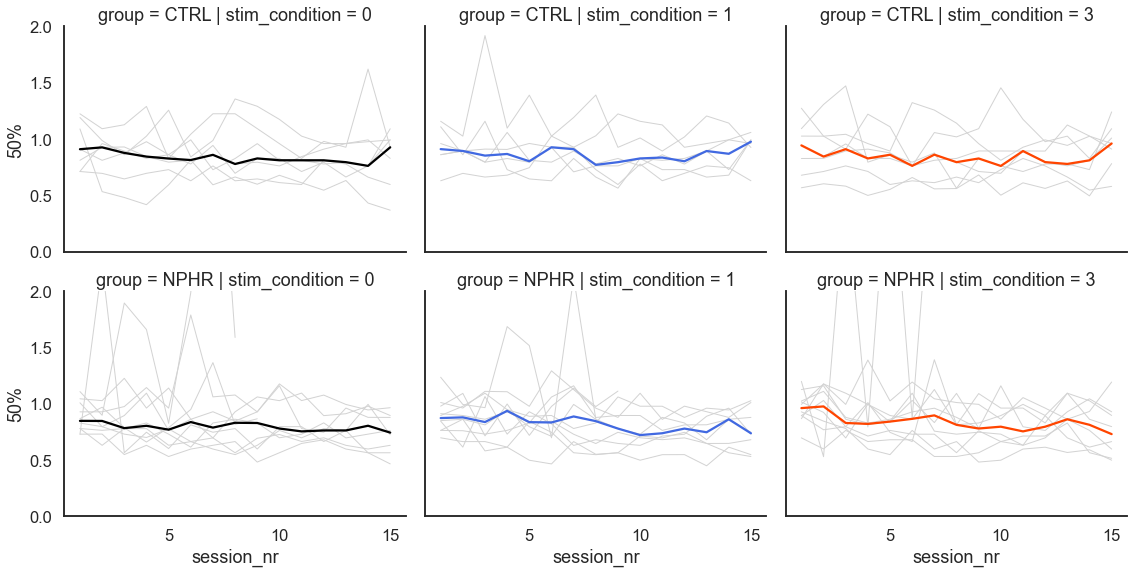

In [88]:
g=plot_individual_metrics_across_sessions(iqr_rats, '50%')
g.set(ylim=[0,2])

#### Compare first and last medians across conditions

In [89]:
first_last = iqr_rats[(iqr_rats['session_nr']==1) | (iqr_rats['session_nr']==15)]

<Figure size 1800x1200 with 0 Axes>

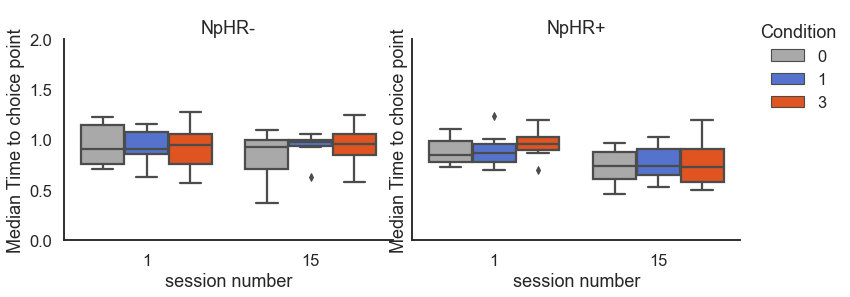

In [92]:
plt.figure(dpi=300)
sns.set(context='talk', style='white')
g=sns.catplot(kind='box',data=first_last, col='group', x='session_nr', y='50%', 
              hue='stim_condition', palette=['darkgray', 'royalblue', 'orangered'],
              height=4, aspect=1.3)
g.set(ylim=[0,2], ylabel='Median Time to choice point', xlabel='session number', xticks=[0,1],
     xticklabels=['1','15'])
ax=g.axes.flatten()
ax[0].set_title('NpHR-')
ax[1].set_title('NpHR+')
g._legend.set(title='Condition', bbox_to_anchor=[.97,.8])
sns.despine()

#### Compare first and last medians across groups

<Figure size 1800x1200 with 0 Axes>

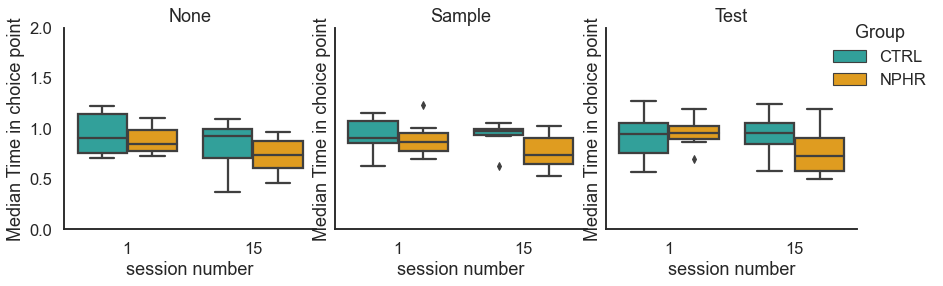

In [100]:
plt.figure(dpi=300)
sns.set(context='talk', style='white')
g=sns.catplot(kind='box',data=first_last, hue='group', x='session_nr', y='50%', 
              col='stim_condition', palette=['lightseagreen', 'orange'],
              height=4, aspect=1)
g.set(ylim=[0,2], ylabel='Median Time in choice point', xlabel='session number', xticks=[0,1],
     xticklabels=['1','15'])
ax=g.axes.flatten()
ax[0].set_title('None')
ax[1].set_title('Sample')
ax[2].set_title('Test')
g._legend.set(title='Group', bbox_to_anchor=[.97,.8])
sns.despine()